## Decision tree for classification

__Classification Tree__ \
A Classification Tree is a supervised learning model that predicts a categorical label (like 'Yes'/'No' or 'Spam'/'Not Spam') by learning a series of simple if/else decision rules from the data. The best way to think about it is as an automated flowchart. The model asks a sequence of questions to the data, and each answer leads it down a different path until it reaches a final decision.

Imagine you're playing a game where your friend is thinking of an animal.

* You ask: "Does it live in water?" (This is your first split)

* Answer: Yes. -> You then ask: "Does it have fins?"

* Answer: No. -> You then ask: "Is it a mammal?" \
You continue asking these simple questions to narrow down the possibilities until you can make a final guess. A classification tree learns the most efficient sequence of questions to ask to classify your data.

In contrast to linear models, trees are able to capture non-linear relationships between features and labels. In addition, trees do not require the features to be on the same scale, for example through standardization.

__How Does a Classification Tree Work?__ \
The "magic" of a decision tree is how it learns which questions to ask and in what order. It does this by finding the splits that create the "purest" possible subgroups.

1. __Start with all data__: The tree starts with all your data in one group at the top (the root node).

2. __Find the Best Split__: The algorithm looks at every single feature and finds the one question (the best split) that does the best job of separating the data into distinct classes. For example, it might find that asking "Is the weather outlook sunny?" is the best first question because it perfectly separates many of the "Go to Beach" vs. "Stay Home" outcomes.

3. __Measure "Purity"__: It determines the "best" split using a metric like Gini Impurity. Gini impurity is a measure of how mixed up the classes are in a group. A Gini of 0 means a group is perfectly pure (all one class). The algorithm chooses the split that leads to the biggest decrease in impurity.

4. __Repeat__: The process is repeated for each new subgroup. The tree continues to split the data into smaller and smaller, purer and purer groups until it reaches a stopping point (e.g., a group is perfectly pure, or the tree reaches a pre-defined maximum depth).

The maximum number of branches separating the top from an exreme end is known as the __maximum depth__. 

__Decision region__ \
A decision region is a region in the feature space where all instances in one region are assigned only to one class label. These regions are separated by surfaces called __Decision boundaries__. The decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

In [1]:
import pandas as pd

wbc = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\wbc.csv", usecols=['diagnosis', 'radius_mean', 'concave points_mean'])
print(wbc.head())

  diagnosis  radius_mean  concave points_mean
0         M        17.99              0.14710
1         M        20.57              0.07017
2         M        19.69              0.12790
3         M        11.42              0.10520
4         M        20.29              0.10430


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wbc[['radius_mean', 'concave points_mean']].values
y = np.where(wbc['diagnosis'] == 'M', 1, 0)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y, random_state=1)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))                                          

[0 0 0 1 0]
Test set accuracy: 0.89


## Classification tree learning

A classification tree learns by creating a set of decision rules, much like a flowchart, to predict a categorical outcome. It does this by recursively splitting the data into smaller, purer subgroups based on the features that provide the most __Information Gain__.

__Building blocks of a Decision-Tree__ \
1. __Decision-Tree__: A decision-tree is a data structure consisting of a hierarchy of individual units called __nodes__.
2. __Node__: A node is a point that involves either a question or a prediction.
   * __Root node__: This is the node at which the decision tree starts growing. It has no parent node and involves a question that gives rise to two children nodes through two branches.
   * __Internal node__: This is a node that have one parent node. It also involves a question that gives rise to two children nodes.
   * __Leaf__: This node has no children. A leaf has one parent node and involves no questions. It is where a prediction is made.

Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. In other words, the tree is trained in such a way that, in each leaf, one class-label is predominant.

__Information Gain (IG)__ \
The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. To produce the purest leafs possible, at each node, a tree asksa question involving one feature and one split-point. The tree knows the feature and split-point to pick by maximizing the Information Gain.

To understand Information Gain, you first need to understand impurity. Impurity is a number that tells you how mixed a group is. Criteria used to measure the impurity of a node include:
1. Gini Index
2. Entropy

* A Gini Impurity of 0 means a group is perfectly pure (all data points belong to one class).

* A high Gini Impurity means a group is very mixed.

Information Gain is the measure of the reduction in impurity achieved by a particular split. It's calculated as: \
IG = Impurity(parent node) - Weighted Average Impurity(child nodes)

The tree learns by always choosing the split that maximizes this Information Gain. It's always looking for the question that will give it the most clarity and lead to the purest possible subgroups.

When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. At a non-leaf node, the data is split based on feature and split-point in such a way to maximize Information Gain. If the information gain obtained by splitting a node is null, the node is declared a leaf. If the maximum depth of a tree is constrained, to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null 

In [3]:
## Using entropy as criterion
wbc_all = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\wbc.csv")

X = wbc_all.drop('diagnosis', axis=1).values
y = np.where(wbc['diagnosis'] == 'M', 1, 0)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y, random_state=1)

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

Accuracy achieved by using entropy: 0.912


In [4]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.939


## Decision-Tree for Regression

A Regression Tree is a type of decision tree used to predict a continuous numerical value (like a price, an age, a temperature, etc.). Just like a classification tree, it creates a flowchart of if/else rules, but instead of ending in a class label ('Yes'/'No'), it ends in a numerical prediction. In classification tree, the goal is to create subgroups that are as "pure" as possible (containing mostly one class), in which case the prediction will be the majority in a leaf node. However, in regression tree, the goal is to create subgroups where the target values are as similar as possible to each other. The prediction is the average of the target values in a leaf node.

Recall that linear models such as linear regression would not be able to capture a non-linear trend.

When a regression tree is trained on a dataset, the impurity of a node is measured using the mean squares error of the target values in that node. This means that the regression tree try to find the splits that produce leafs where in each leaf, the target values are on average, the closest possible to the mean-value of the labels in that particular leaf. As a new instance traverses and reaches a certain leaf, its target variable y, is computed as the as the average of the target variables contained in that leaf.

In [5]:
import pandas as pd
auto = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\auto.csv")
print(auto.head())

    mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

# perform one hot encoding on origin
auto_encoded = pd.get_dummies(auto, columns=['origin'], drop_first=True)

X = auto_encoded.drop('mpg', axis=1).values
y = auto_encoded['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


## Generalization Error

In supervised learning, you make the assumption that there is a mapping $f$ between features and labels. You can express this as $ y = f(x) $. $f$ is an unknown function you want to determine. In reality, data generalization is always accompanied with randomness or noise. Your goal is to find a model, $\hat{f}$ that best approximates $f$. $\hat{f}$ can be Logistic regression, Decision Tree, Neural Network, etc. When training  $\hat{f}$, you want to make sure that noise is discarded as much as possible. At the end,  $\hat{f}$ should achieve a low predictive error on unseen datasets.

You may encounter two difficulties when approximating $f$:
1. __Overfitting__: This when  $\hat{f}$ fits the noise in the training set
2. __Underfitting__: This is when  $\hat{f}$ is not flexible enough to approximate f.

When a model overfits the training the set, its predictive power on unseen datasets is pretty low. The model will memorize the noise present in the training set. Such model achieves a low training set error and a high test set error. When a model underfits the data, the training set error is roughly equal to the test set error. However, both errors are relatively high. As a result, the trained model is not flexible enough to capture the complex dependency between features and labels.

The generalization error of a model is the measure of how accurately the model is able to predict outcomes for new, previously unseen data. It tells you how the model generalizes on unseen data

__The Three Components of Generalization Error__ \
Generalization error can be decomposed into three components:
1. __Bias error__: This tells you, on average, how $\hat{f}$ and $f$ are different. A high-bias model fails to capture the true underlying patterns in the data. High bias models lead to underfitting.
2. __Variance error__: This tells you how much $\hat{f}$ is inconsistent over different training sets. A high-variance model learns the "noise" in the training data, not just the signal. A high variance model leads to overfitting
3. __Irreducible error__: This is the error contribution of noise. It is the baseline error that you can never get rid of, no matter how good your model is. Thus, it is a constant.

__Model Complexity__ \
The complexity of a model sets its flexibility to approximate the true function $f$. For example, increasing the maximum depth increases the complexity of a Decision-Tree.

__Bias-Variance Tradeoff__\
When model complexity increases, the variance increases while the bias decreases and vice versa. Your goal is to find the model complexity that achieves the lowest generalization error. Thus, we need to find a balance between bias and variance because as one increases, the other decreases. This is knowns as the __bias-variance tradeoff__.

## Diagnosing Bias and Variance Problems

__Estimating the Generalization Error__ \
Given that you have trained a supervised learning model, $\hat{f}$, how do you estimate $\hat{f}$ generalization error? This cannot be done directly because:
* $f$ is unknown
* you usually have only one dataset
* noise is unpredictable

A solution to this is to:
* split the data into a training and test set
* fit the model $\hat{f}$ to the training set
* evaluate the error of $\hat{f}$ on the unseen test set
* approximate the generalization error of $\hat{f}$ by the $\hat{f}$ error on the test set

__Better Model Evaluation with Cross-Validation__ \
Usually, the test set should not be touched until we are confident about $\hat{f}$'s performance. It should only be used to evalute $\hat{f}$'s final performance or error. Evaluating $\hat{f}$ performance on the training set may produce an optimistic estimation of the error becahuse $\hat{f}$ has already been exposed to the training set when it was fit. To obtain a reliable estimate of $\hat{f}$'s performance, use a technique called __cross-validation__ (CV). CV can be performed using K-Fold CV or Hold-Out CV. Let's focus on K-Fold. Here, the training set is split randomly into a number of folds, say 10. The error of $\hat{f}$ is evaluated ten times on the 10 folds. Each time, one fold is picked for evaluation after training $\hat{f}$ on the other 9 folds. At the end, you will obtain a list of 10 errors. Finally, the CV-error is computed as the mean of the 10 obtained errors.

__Diagnose Variance Problems__ \
If the CV-error of $\hat{f}$ is greater than $\hat{f}$'s training set error, $\hat{f}$ is said to suffer from __high variance__. In such case, $\hat{f}$ has overfit the training set. To remedy this, try decreasing the model complexity. For example, in a decision tree,you can reduce the maximum tree depth or increase the maximum samples per leaf. In addition, you may also gather more data to train $\hat{f}$.

__Diagnose Bias Problems__ \
$\hat{f}$ is said to suffer from __high bias__ if the CV error is roughly equal to the training error but much greater than the desired error. In such case, $\hat{f}$ underfits the training set. To remedy this, try increasing the model complexity or gather more relevant features for the problem.

In [7]:
from sklearn.model_selection import cross_val_score

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [8]:
# Evaluating the training error

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Here,we notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise. Thus, we can conclude that the model suffers from high bias

## Ensemble Learning

Ensemble learning is the technique of combining the predictions from multiple machine learning models to make a more accurate and robust prediction than any single model could on its own. It can be summarized as follows: 
1. Different models are trained on the same dataset
2. Each model makes its own prediction
3. A meta-model then aggregates the predictions of individual models and outputs a final prediction
4. The final prediction is more robust and less prone to errors.
5. The best results are obtained when the models are skillful in different ways, meaning that if some models make predictions that are way off, the other models should compensate these errors.

There are few techniques in ensemble learning including:
* voting
* bagging
* boosting

We will focus on voting here.

__Voting Classifier__ \
The ensemble here consists of N classifiers making predictions $P_1$, $P_2$, ..., $P_N$, with $P_i$ = 0 or 1. This is for a binary classification task. The meta-model outputs the final prediction by hard voting

In [9]:
indian_liver_patient = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\indian_liver_patient_preprocessed.csv")

X = indian_liver_patient.drop("Liver_disease", axis=1)
y = indian_liver_patient['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(max_iter=1000, random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [11]:
## Evaluate different individual classifiers
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730


Logistic Regression achieved the highest accuracy of 74.7%

In [12]:
## evaluating performance using VotingClassifier
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.759


## Bagging

Previously, we saw that Voting Classifier is an ensemble of models that are fit to the same training set using different algorithms. We also saw that the final predictions were obtained by majority voting. In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data. This aims to improve the stability and accuracy of a machine learning model by reducing variance and preventing overfitting.

Bagging stands for Boostrap Aggregation. Its name refers to the fact that it uses a technique known as __bootstrap__. Consider the case where you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn with replacement. In the training phase, bagging consists of N different boostrap samples from the training set. Each of these bootstrap samples are then used to train N models that use the same algorithm. When a new instance is fed to the different models forming the bagging ensemble, each model output its prediction. The meta-model collects these predictions and outputs a final prediction depending on the nature of the problem. In classification, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is _BaggingClassifier_. In regression, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is _BaggingRegressor_

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [14]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.72


## Out of Bag Evaluation

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instances may not be sampled at all. On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as __Out-of-bag__ (OOB) instances. Since OOB instances are not seen by the model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as __OOB Evaluation__. 

__Case Study__ \
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset. In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In [15]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.690, OOB accuracy: 0.676


## Random Forests

In bagging, the base estimator could be any model including the decision-tree, logistic regression, neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set, using all available features. Random forest is an ensemble method that uses a desicion tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features. The node is then split using the sampled feature that maximizes information gain. In scikit-learn, d defaults to the square root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node. Once trained, predictons can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-model and a final prediction is made depending on the nature of the problem. For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is _RandomForestClassifier_. For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is _RandomForestRegressor_. In general, random forests achieve a lower variance than individual trees.

__Feature IMportance__ \
When a tree-based  method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring the tree nodes use a particular feature to reduce impurity. Note that the importance of a feature is expressed as a percentage, indicating the weight of that feature in training and prediction. The feature importances can be accessed by extracting the _feature_importance__ attribute from the model

In [16]:
bikes = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\bikes.csv")

X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [17]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test, y_pred)) ** (1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


In [18]:
## training a single decision tree

single_tree = DecisionTreeClassifier(random_state=2)
single_tree.fit(X_train, y_train)
pred_tree = single_tree.predict(X_test)
rmse_tree = (MSE(y_test, pred_tree)) ** (1/2)

# Print rmse_tree
print('Test set RMSE of rf: {:.2f}'.format(rmse_tree))

Test set RMSE of rf: 112.99


The test set RMSE achieved by rf is significantly smaller than that achieved by a single Decision-Tree

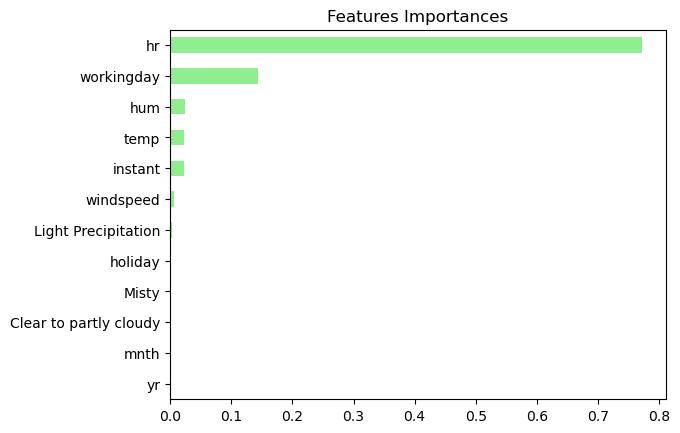

In [19]:
## Visualizing features importances

import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## Boosting

Boosting refers to an ensemble in which many predictors (models) are trained, and each predictor learns from the errors of its predecessor. In boosting, several weak learners are combined to form a strong learner. A weak learner is a model doing slightly better than random guessing. For example, a decision tree with a maximum-depth of one, known as a __decision stump__, is a weak learner. In boosting, an ensemble of predictors are trained sequentially, and each predictor tries to correct the errors made by its predecessors.

The two most popular boosting methods are:
1. Adaboost
2. Gradient boosting

#### Adaboost

Adaboost stands for __Adaptive Boosting__. In Adaboost, each predictor pays attention to the instances wrongly predicted by its predecessor by constantly changing the weights of the training instances. Furthermore, each predictor is assigned a coefficient , $\alpha$, that weighs its contribution in the ensemble's final prediction. $\alpha$ depends on the predictor's training error. Lets asssume there are N predictors in total. First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. This error can then be used to determine $\alpha_1$ which is predictor1's coefficient. $\alpha_1$ is then used to determine the weights W(2) of the training instances for predictor2. As a result, the incorrectly predicted instances acquire higher weights. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. This process is repeated sequentially, until the N predictors forming the ensemble are trained.

__Learning rate__ \
An important parameter used in training is the learning rate, $\eta$. $\eta$ is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor. It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of $\eta$ should be compensated by a greater number of estimators.

__Prediction__ \
Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem. For classification, each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted majority voting. The corresponding class in scikit-learn is _AdaBoostClassifier_. For regression, the same procedure is applied and the ensemble's prediction is obtained by performing a weighted average. The corresponding class in scikit-learn is _AdaBoostRegressor_. It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.

In [20]:
X = indian_liver_patient.drop("Liver_disease", axis=1)
y = indian_liver_patient['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

C:\Users\Odinaka Ekemezie\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC AUC score: 0.65


## Gradient Boosting

In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to Adaboost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels. Let's further explain gradient boosting with the analogy below: 
* The Goal: To create a perfectly accurate portrait of a person.

* Artist 1 (The First Weak Learner): Makes a very simple, rough initial sketch of the person's face. It's a bad prediction. The "error" (the residual) is the difference between this rough sketch and the actual person's face.

* The "Boost": The team leader doesn't show the original photo to the second artist. Instead, they show them a picture of the error—a ghostly image highlighting where the first sketch was wrong (e.g., "the nose is too short," "the chin is too wide").

* Artist 2: This artist's only job is to create a drawing of just those corrections.

* The Final Portrait: The final, accurate portrait is created by taking the first rough sketch, then adding the corrections from Artist 2, then adding the corrections from Artist 3, and so on. Each artist makes a small, incremental improvement, gradually turning the rough sketch into a masterpiece.

Now lets asssume there are N trees in an ensemble. Tree1 is trained using the features matrix X and the dataset labels y. The predictions labeled $\hat{y_1}$ are used to determine the training set residual errors r1. Tree2 is then trained using the features matrix X and the residual errors r1 of Tree1 as labels. The predicted residuals $\hat{r_1}$  are then used to determine the residuals of residuals which are labeled r2. This process is repeated until all of the N trees forming the ensemble are trained.

__Shrinkage__ \
An important parameter used in training gradient boosted trees is shrinkage. In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate $\eta$ which is a number between 0 and 1. Similarly to AdaBoost, there's a trade-off between $\eta$  and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

__Prediction__ \
Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown below:
$$
y_{pred} = y_1 + \eta{r_1} + ... + \eta{r_N}
$$
In scikit-learn, the class for a gradient boosting regressor is _GradientBoostingRegressor_. For classification problems, the class implementing gradient-boosted-classification in scikit-learn is _GradientBoostingClassifier_.

In [22]:
bikes = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\bikes.csv")

X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [23]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** (1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


## Stochastic Gradient Boosting

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features. To mitigate these effects, you can use an algorithm known as __stochastic gradient boosting__. Stochastic Gradient Boosting (SGB) is a modification of the Gradient Boosting method that incorporates randomness to improve its performance and reduce overfitting. The "stochastic" part simply means random. It combines the error-correcting, sequential nature of Gradient Boosting with the random sampling idea from Bagging. In stochastic gradient boosting, each CART is trained on a random subset of the training data. This subset is sampled without replacement. Furthermore, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.

Lets describe the training procedure of Stochastic Gradient Boosting. First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. The sampled data is then used for training a tree. However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose. Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate $\eta$ and are fed to the next tree in the ensemble. This procedure is repeated sequentially until all the trees in the ensemble are trained. The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.

In scikit-learn, Stochastic Gradient Boosting isn't a separate model. It's implemented directly within GradientBoostingRegressor and GradientBoostingClassifier using the _subsample_ hyperparameter. The subsample is set so each tree samples a particular percentage of the data. The parameter _max_features_ can also be set so that each tree uses a particular percentage of available features to perform the best-split.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** (1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 49.537)

## Tuning a CART's Hyperparameters

To obtain a better performance, the hyperparameters of a machine learning mpdel should be tuned. Machine learning models are characterized by parameters and hyperparameters. Parameters are learned from data through training; examples of parameters include the split-feature and the split-point of a node in a CART. Hyperparameters are not learned from data; they should be set prior to training. Examples of hyperparameters include the maximum-depth, min_samples_leaf, and the splitting-criterion of a CART.

__Hyperparameter tuning__ \
Hyperparameter tuning consists of searching for the set of optimal hyperparameters for the learning algorithm. The solution involves finding the set of optimal hyperparameters that yields an optimal model. The optimal model yields an optimal score. The score function measures the agreement between true labels and a model's predictions. In sklearn, it defaults to accuracy for classifiers and r-squared for regressors. A model's generalization performance is evaluated using __cross-validation__.

A legitimate question that you may ask is: why bother tuning hyperparameters? Well, in scikit-learn, a model's default hyperparameters are not optimal for all problems. Hyperparameters should be tuned to obtain the best model performance.

There are many approaches for hyperparameter tuning including: grid-search, random-search, bayeisian optimization, genetic algorithms, and so on. Here, we'll only be exploring the method of grid-search.

__Grid-search Cross Validation__ \
In grid-search cross-validation, first you manually set a grid of discrete hyperparameter values. Then, you pick a metric for scoring model performance and you search exhaustively through the grid. For each set of hyperparameters, you evaluate each model's score. The optimal hyperparameters are those for which the model achieves the best cross-validation score. Note that grid-search suffers from the curse of dimensionality, i.e., the bigger the grid, the longer it takes to find the solution.

Let's walk through a concrete example to understand this procedure. Consider the case of a CART where you search through the two-dimensional hyperparameter grid shown here: \
max__depth = {2,3,4} \
min_samples_leaf = {0.05, 0.1} \
The dimensions correspond to the CART's maximum-depth and the minimum-percentage of samples per leaf. For each combination of hyperparameters, the cross-validation score is evaluated using k-fold CV for example. Finally, the optimal hyperparameters correspond to the model achieving the best cross-validation score.

To inspect hyperparameters in scikit-learn, first instantiate a DecisionTreeClassifier. call ._get_params()_  method to print out a dictionary where the keys are the hyperparameter names like max_depth, max_features and min_samples_leaf. Note that max_features is the number of features to consider when looking for the best split. When it's a float, it is interpreted as a percentage. You can learn more about these hyperparameters by consulting scikit-learn's documentation.

In [25]:
X = indian_liver_patient.drop("Liver_disease", axis=1)
y = indian_liver_patient['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [27]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(random_state=1)

In [28]:
# get the hyperparameter names
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}


In [29]:
# Define params_dt
params_dt = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [0.12,0.14,0.16,0.18]
}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


In [30]:
# extract the best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'min_samples_leaf': 0.14}


In [31]:
# Extract best CV score from grid_dt
best_CV_score = grid_dt.best_score_
print('Best CV roc-auc score:\n', best_CV_score)

Best CV roc-auc score:
 0.717498076826435


## Tuning Random Forest's Hyperparameters

In addition to the hyperparameters of the CARTs forming random forests, the ensemble itself is characterized by other hyperparameters such as the number of estimators, whether it uses bootstraping or not and so on. As a note, hyperparameter tuning is computationally expensive and may sometimes lead only to very slight improvement of a model's performance. For this reason, it is desired to weigh the impact of tuning on the pipeline of your data analysis project as a whole in order to understand if it is worth pursuing.

To inspect the hyperparameters of a RandomForestRegressor, first, import RandomForestRegressor from sklearn.ensemble and then instantiate a RandomForestRegressor, rf. The hyperparameters of rf along with their default values can be accessed by calling rf's _.get_params()_ method. In the following, we'll be optimizing n_estimators, max_depth, min_samples_leaf and max_features. You can learn more about these hyperparameters by consulting scikit-learn's documentation.

In [33]:
bikes = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\bikes.csv")

X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

rf = RandomForestRegressor(random_state=2)

# extract the hyperparameter names and their default values
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


In [38]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100,350,500],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [2,10,30]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# fit the training set
grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = (MSE(y_test, y_pred)) ** (1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Test RMSE of best model: 89.583


In [39]:
print(best_model)

RandomForestRegressor(max_features='log2', min_samples_leaf=2, n_estimators=500,
                      random_state=2)
